# Wrfcf Livneh 2017-02-05 to 2017-02-17 Positive Bias Point Time Series

In [1]:
# imports
import numpy
import Nio
import Ngl
from IPython import display
import netCDF4 as nc
from datetime import date
from datetime import timedelta
import xarray as xr
import xesmf as xe
import matplotlib.pyplot as plt

In [2]:
# reading in livneh
fn = '/cw3e/mead/projects/cwp103/scratch/ldehaan/Livneh/ptt_2017.nc'
liv = xr.open_dataset(fn)
liv

<xarray.Dataset>
Dimensions:  (Time: 365, lat: 444, lon: 922)
Coordinates:
  * Time     (Time) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-12-31
  * lat      (lat) float64 25.16 25.22 25.28 25.34 ... 52.66 52.72 52.78 52.84
  * lon      (lon) float64 -124.6 -124.5 -124.5 -124.4 ... -67.16 -67.09 -67.03
Data variables:
    Tmax     (Time, lat, lon) float32 ...
    Tmin     (Time, lat, lon) float32 ...
    PRCP     (Time, lat, lon) float32 ...
Attributes:
    missing_value:  -1e+36

In [3]:
# based on bias mapping, region near lat 47.08, lon 99.44 exhibits relatively high positive bias
# finding coords in livneh close to these, arbitrarily choosing the first value in the output array
lat_ind = numpy.where(numpy.logical_and(liv['lat'].data.flatten() >= 46, liv['lat'].data.flatten() <= 47))[0][0]
lon_ind = numpy.where(numpy.logical_and(liv['lon'].data.flatten() >= -100, liv['lon'].data.flatten() <= -99))[0][0]

In [4]:
# tmax values at coords for each day
liv_arr = liv['Tmax'].isel(lat=lat_ind, lon=lon_ind)[35:46]
liv_arr

<xarray.DataArray 'Tmax' (Time: 11)>
array([ -8.96209,  -9.99209, -10.50209, -15.65209, -11.90209,   2.09791,
         6.76791,   3.62791,   3.05791,   3.28791,   3.15791], dtype=float32)
Coordinates:
  * Time     (Time) datetime64[ns] 2017-02-05 2017-02-06 ... 2017-02-15
    lat      float64 46.03
    lon      float64 -99.97
Attributes:
    units:    Celsius

In [5]:
# reading in wrfcf tmaxes
wrf_05 = xr.open_dataset('./wrf_05-Copy1.nc')
wrf_06 = xr.open_dataset('./wrf_06-Copy1.nc')
wrf_07 = xr.open_dataset('./wrf_07-Copy1.nc')
wrf_08 = xr.open_dataset('./wrf_08-Copy1.nc')
wrf_09 = xr.open_dataset('./wrf_09-Copy1.nc')
wrf_10 = xr.open_dataset('./wrf_10-Copy1.nc')
wrf_11 = xr.open_dataset('./wrf_11-Copy1.nc')
wrf_12 = xr.open_dataset('./wrf_12-Copy1.nc')
wrf_13 = xr.open_dataset('./wrf_13-Copy1.nc')
wrf_14 = xr.open_dataset('./wrf_14-Copy1.nc')
wrf_15 = xr.open_dataset('./wrf_15-Copy1.nc')

wrf_lst = [wrf_05, wrf_06, wrf_07, wrf_08, wrf_09, wrf_10, wrf_11, wrf_12, wrf_13, wrf_14, wrf_15]

In [6]:
# finding value at lat lon visualization for reference
lat_ind2 = numpy.where(numpy.logical_and(wrf_05['lat'].data.flatten() >= 46, wrf_05['lat'].data.flatten() <= 47))[0][0]
lon_ind2 = numpy.where(numpy.logical_and(wrf_05['lon'].data.flatten() >= -100, wrf_05['lon'].data.flatten() <= -99))[0][0]
wrf_05_arr = wrf_05['maxes'].isel(lat=lat_ind, lon=lon_ind) - 273.15
wrf_05_arr

<xarray.DataArray 'maxes' ()>
array(-3.14521678)
Coordinates:
    time     datetime64[ns] ...
    lon      float64 -99.97
    lat      float64 46.03

In [7]:
# creates array of all T_2m max values at lat lon for each day
def wrf_tmaxes():
    result_arr = []
    for i in wrf_lst:
        lat_index = numpy.where(numpy.logical_and(i['lat'].data.flatten() >= 46, 
                                                 i['lat'].data.flatten() <= 47))[0][0]
        lon_index = numpy.where(numpy.logical_and(i['lon'].data.flatten() >= -100, 
                                                 i['lon'].data.flatten() <= -99))[0][0]
        val = i['maxes'].isel(lat=lat_ind, lon=lon_ind) - 273.15 # convert from K to C
        result_arr.append(val.data.item(0))
    return result_arr

wrf_arr = wrf_tmaxes()
wrf_arr

[-3.1452167848816543,
 -2.7844800589703596,
 -10.583643969050854,
 -13.322715502655342,
 -3.6518064375522385,
 11.169764230145631,
 8.115779597705057,
 5.586100735882383,
 7.671429168298118,
 6.7872378976559276,
 11.233473797157103]

In [8]:
# reading in cpc
fn1 = '/cw3e/mead/projects/cwp103/scratch/ldehaan/CPC/tmax.2017.nc'
cpc = xr.open_dataset(fn1)
lat_ind3 = numpy.where(numpy.logical_and(cpc['lat'].data.flatten() >= 46, cpc['lat'].data.flatten() <= 47))[0][0]
lon_ind3 = numpy.where(numpy.logical_and(cpc['lon'].data.flatten() >= 360-100, cpc['lon'].data.flatten() <= 360-99))[0][0]
cpc_arr = cpc['tmax'].isel(lat=lat_ind3, lon=lon_ind3)[36:47]
cpc_noshft = cpc['tmax'].isel(lat=lat_ind3, lon=lon_ind3)[35:46]
cpc_arr

<xarray.DataArray 'tmax' (time: 11)>
array([-11.692767, -14.528471, -16.210936,  -6.153211,   7.062345,   5.032148,
         2.116477,   3.4553  ,   2.357618,   5.174923,   8.895266],
      dtype=float32)
Coordinates:
    lat      float32 46.75
    lon      float32 260.2
  * time     (time) datetime64[ns] 2017-02-06 2017-02-07 ... 2017-02-16
Attributes: (12/13)
    units:         degC
    var_desc:      Maximum Temperature
    level_desc:    Surface
    statistic:     Maximum
    parent_stat:   Other
    long_name:     Daily Maximum Temperature
    ...            ...
    valid_range:   [-90.  50.]
    avg_period:    0000-00-01 00:00:00
    dataset:       CPC Global Temperature
    comments:      GTS data and is gridded using the Shepard Algorithm
    max_period:    6z to 6z
    actual_range:  [-56.827217  55.789146]

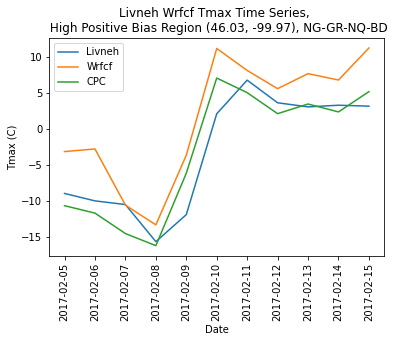

In [9]:
# time series plot
y1 = liv_arr.data
y2 = wrf_arr
y3 = cpc_noshft.data
x = numpy.array(['2017-02-05', 
                '2017-02-06',
                '2017-02-07',
                '2017-02-08',
                '2017-02-09',
                '2017-02-10',
                '2017-02-11',
                '2017-02-12',
                '2017-02-13',
                '2017-02-14',
                '2017-02-15'])
plt.plot(x, y1) # livneh blue
plt.plot(x, y2) # wrfcf orange
plt.plot(x, y3)

# plot styling
plt.title("Livneh Wrfcf Tmax Time Series, \n High Positive Bias Region (46.03, -99.97), NG-GR-NQ-BD")
plt.xlabel("Date")
plt.ylabel("Tmax (C)")
plt.xticks(rotation=90)
plt.gca().legend(('Livneh','Wrfcf','CPC'))

plt.show()

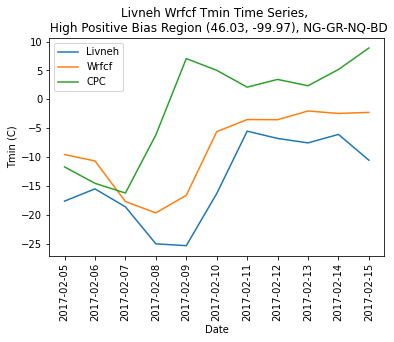

In [10]:
# same process but for tmin

# reading in wrfcf tmins
wrf_05_tmin = xr.open_dataset('./wrf_05_tmin-Copy1.nc')
wrf_06_tmin = xr.open_dataset('./wrf_06_tmin-Copy1.nc')
wrf_07_tmin = xr.open_dataset('./wrf_07_tmin-Copy1.nc')
wrf_08_tmin = xr.open_dataset('./wrf_08_tmin-Copy1.nc')
wrf_09_tmin = xr.open_dataset('./wrf_09_tmin-Copy1.nc')
wrf_10_tmin = xr.open_dataset('./wrf_10_tmin-Copy1.nc')
wrf_11_tmin = xr.open_dataset('./wrf_11_tmin-Copy1.nc')
wrf_12_tmin = xr.open_dataset('./wrf_12_tmin-Copy1.nc')
wrf_13_tmin = xr.open_dataset('./wrf_13_tmin-Copy1.nc')
wrf_14_tmin = xr.open_dataset('./wrf_14_tmin-Copy1.nc')
wrf_15_tmin = xr.open_dataset('./wrf_15_tmin-Copy1.nc')
wrf_lst_tmin = [wrf_05_tmin, wrf_06_tmin, wrf_07_tmin, wrf_08_tmin, wrf_09_tmin, wrf_10_tmin,
                wrf_11_tmin, wrf_12_tmin, wrf_13_tmin, wrf_14_tmin, wrf_15_tmin]
def wrf_tmins():
    result_arr = []
    for i in wrf_lst_tmin:
        lat_index = numpy.where(numpy.logical_and(i['lat'].data.flatten() >= 46, 
                                                 i['lat'].data.flatten() <= 47))[0][0]
        lon_index = numpy.where(numpy.logical_and(i['lon'].data.flatten() >= -100, 
                                                 i['lon'].data.flatten() <= -99))[0][0]
        val = i['mins'].isel(lat=lat_ind, lon=lon_ind) - 273.15 # convert from K to C
        result_arr.append(val.data.item(0))
    return result_arr

wrf_arr_tmin = wrf_tmins()

# reading in livneh tmins
liv_arr_tmin = liv['Tmin'].isel(lat=lat_ind, lon=lon_ind)[35:46]

# timeseries plot tmin
y1 = liv_arr_tmin.data
y2 = wrf_arr_tmin
x = numpy.array(['2017-02-05', 
                '2017-02-06',
                '2017-02-07',
                '2017-02-08',
                '2017-02-09',
                '2017-02-10',
                '2017-02-11',
                '2017-02-12',
                '2017-02-13',
                '2017-02-14',
                '2017-02-15'])
plt.plot(x, y1) # livneh blue
plt.plot(x, y2) # wrfcf orange

# plot styling
plt.title("Livneh Wrfcf Tmin Time Series, \n High Positive Bias Region (46.03, -99.97), NG-GR-NQ-BD")
plt.xlabel("Date")
plt.ylabel("Tmin (C)")
plt.xticks(rotation=90)
plt.gca().legend(('Livneh','Wrfcf'))

plt.show()

fin.